**Cell 1: Imports & Load Data**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

from xgboost import XGBRegressor
import joblib

df = pd.read_csv("/content/insurance_premium_dataset.csv")

**Cell 2: Encoding Categorical Variables**

In [2]:
cat_cols = ["city", "locality_category", "policy_type", "occupation_type"]

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

**Cell 3: Train-Test Split**

In [3]:
X = df.drop("annual_premium", axis=1)
y = df["annual_premium"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Cell 4: XGBoost Model Training**

In [4]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.08,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

**Cell 5: Model Evaluation**

In [5]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.9974881847331396
MAE: 864.2528396894531


**Cell 6: Save Model & Encoders**

In [6]:
joblib.dump(model, "model.pkl")
joblib.dump(encoders, "encoders.pkl")



['encoders.pkl']

**Cell 7: Feature Importance**

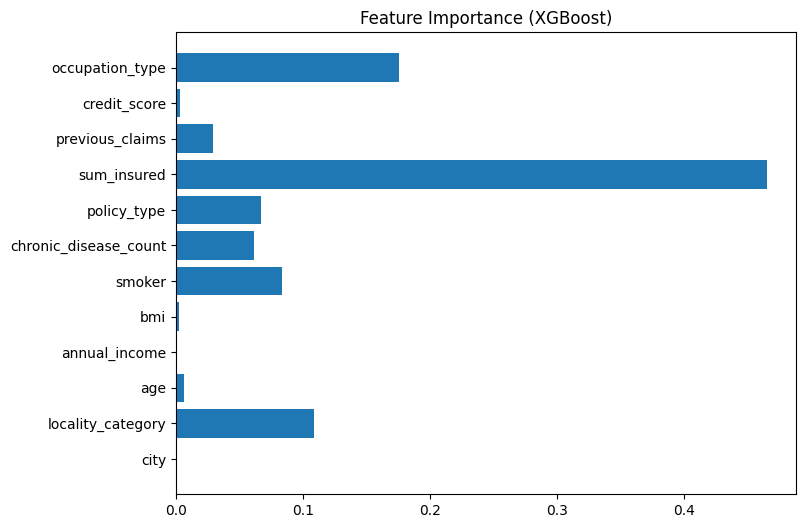

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance (XGBoost)")
plt.show()

